<a href="https://colab.research.google.com/github/chodijhansi/CodeAlpha_Hand-Written-character-recognition/blob/main/copy_of_untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Import necessary libraries



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Preprocessing

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2572 - accuracy: 0.9271 - val_loss: 0.1452 - val_accuracy: 0.9558
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1123 - accuracy: 0.9665 - val_loss: 0.0994 - val_accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0763 - accuracy: 0.9770 - val_loss: 0.0871 - val_accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.0826 - val_accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0792 - val_accuracy: 0.9756


# Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9756
Test accuracy: 0.975600004196167


# Function to predict and display images

In [ ]:
def predict_image(index):
    image = x_test[index]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_class = np.argmax(prediction)
    print(f'Predicted class: {predicted_class}')

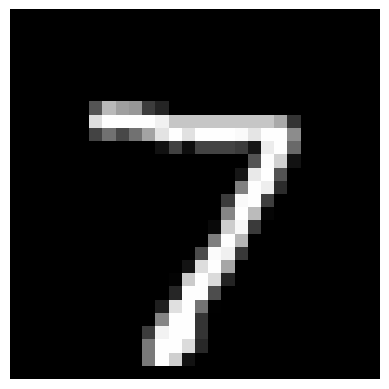

1/1 [==============================] - 0s 98ms/step
Predicted class: 7


In [ ]:
# Example: Predict and display image at index 0
predict_image(0)